# LV Weibo Analysis
## Author: Peiyu Xu
### Axiom Tech Consulting

#### Description:
Data is collected from LV China's Official Sina Weibo account.It includes all original weibo and repost weibo.

Main page:https://weibo.com/louisvuitton?topnav=1&wvr=6&topsug=1

Crawler credit to:https://github.com/dataabc/weiboSpider


## Analysis Plan
1. EDA for numerical variables [Finished]
2. Content anlysis [Finished]
   -  extract hashtags
   - extract @ (celebrities)
3. Transform Time variable
4. Visualization / correlation among different numerical variables
5. NLP
   - PKUSEG: Chinese words. segment 'content' 
   - NLTK: n-gram analysis, tf-idf

In [1]:
# import packages
import pandas as pd
import jieba
import jieba.analyse
import matplotlib.pyplot as plt
import numpy as np
import chardet
from wordcloud import WordCloud,STOPWORDS
import thulac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
# import LV_weibo.csv
data=pd.read_csv(r"LV_weibo.csv")
# dimensons
print(data.shape)

(2285, 9)


2,285 records and 9 columns

In [3]:
# check column names and data types
data.dtypes
#I've renamed column headers manually. In the crawler, headers are definded in Chinese. 
#You can change the headers using the following code.
#data.rename(columns={'微博id':'weibo_id','微博正文':'content','原始图片url':'pic_url','发布位置':'location','发布时间':'time','发布工具':'tool','点赞数':'up','转发数':'repost','评论数':'comment'},inplace=True)

weibo_id       object
content        object
picture_url    object
location       object
time           object
tool           object
up              int64
repost          int64
comment         int64
dtype: object

In [4]:
# head 5 records
data.head()

,weibo_id,content,picture_url,location,time,tool,up,repost,comment
0,HzlqJ9A6A,聆听时间齿轮运行之音，在#路易威登时间锦囊#成都展览见证精湛工艺的历久传承。品牌精心挑选数件...,http://ww2.sinaimg.cn/large/6d6f3290gy1g448qk3...,无,6/17/2019 18:30,微博 weibo.com,199,39,30
1,HzcoABt4A,路易威登 B Blossom 全新珠宝系列中，球面星形花卉灵感来源自 Monogram 印花...,http://ww4.sinaimg.cn/large/6d6f3290gy1g434d0o...,无,6/16/2019 19:30,微博 weibo.com,205,26,27
2,HyTlqdrWo,#路易威登时间锦囊#成都展览中的「魔力之箱」领域，呈现一段沉浸式品牌之旅。硬箱设计解构品牌标...,http://wx2.sinaimg.cn/large/6d6f3290gy1g40si7u...,无,6/14/2019 19:00,微博 weibo.com,147,16,13
3,HySX4eQNH,路易威登 LV RAINBOW 太阳眼镜，灵感来源 2019 春夏秀场的斑斓色彩，百搭设计开...,无,无,6/14/2019 18:00,微博 weibo.com,2311,1871,482
4,HyRbt907h,糅合经典元素，品牌创作专属贴纸，为#路易威登时间锦囊#成都展览增色。将这份纪念收入囊中，成为...,http://ww3.sinaimg.cn/large/6d6f3290gy1g40lgbv...,无,6/14/2019 13:30,微博 weibo.com,304,71,38


## EDA

In [5]:
# get summary statistics for numeric variables
data.describe()

,up,repost,comment
count,2285.000000,2285.000000,2285.000000
mean,967.557987,6121.360175,480.472210
std,6952.005086,58180.091735,3073.492308
min,0.000000,0.000000,0.000000
25%,18.000000,17.000000,12.000000
50%,125.000000,38.000000,25.000000
75%,270.000000,115.000000,65.000000
max,261983.000000,1000000.000000,56674.000000


Some outliers have been noticed.

In [6]:
# missing values
data.isnull().sum()

weibo_id       0
content        0
picture_url    0
location       0
time           0
tool           0
up             0
repost         0
comment        0
dtype: int64

In [7]:
# check pearson correlation
data.corr()

,up,repost,comment
up,1.000000,0.475995,0.791032
repost,0.475995,1.000000,0.724529
comment,0.791032,0.724529,1.000000


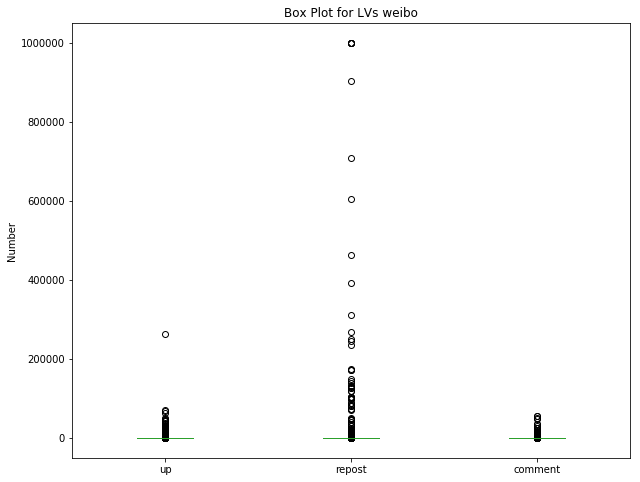

In [8]:
# vertical box plot
data[['up','repost','comment']].plot(kind='box', figsize=(10,8))
plt.title('Box Plot for LV''s weibo')
plt.ylabel('Number')
plt.show()

In [ ]:
# Text Analysis

In [10]:
# a copy
df = data.copy()
print('copy finished')
df.shape

copy finished


(2285, 9)

In [23]:
import re
df['hashtag'] = 0
for i in range(0, len(df['content'])):
    df['hashtag'][i] = re.findall('#([^\#|.]+)\#',df['content'][i])    

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
# count the number of hashtags in content
df['hashtag_number'] = 0
for i in range(0,len(df['hashtag'])):
    df['hashtag_number'][i] = len(df['hashtag'][i])   

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
# stat for 'hashtag_number'
df['hashtag_number'].describe()

count    2285.000000
mean        0.561926
std         0.559306
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: hashtag_number, dtype: float64

In [26]:
# frequency table for 'hashtag-number'
df['hashtag_number'].value_counts()

1    1132
0    1077
2      76
Name: hashtag_number, dtype: int64

In [27]:
df['content'].shape

(2285,)

In [66]:
# extract @ information
# create a list called ['star']
df['star'] = 0
# please change the data type, otherwise will encounter "ValueError:setting an array element with a sequence. "
df['star'] = df['star'].astype('object',inplace=True)
# loop
for i in range(0, len(df['content'])):
    df['star'][i] = re.findall('@([^\s|\/|:|@]+)',df['content'][i])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
# count the number of "@" in content
df['star_number'] = 0
for i in range(0,len(df['star'])):
    df['star_number'][i] = len(df['star'][i])   
print('extract @ number finished')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


extract @ number finished


In [69]:
# frequency table for 'star_number'
df['star_number'].value_counts()

0     1950
1      234
2       55
3       15
4        8
5        7
7        5
9        3
8        3
10       2
6        2
11       1
Name: star_number, dtype: int64

In [70]:
# stat for 'star_number'
df['star_number'].describe()

count    2285.000000
mean        0.256018
std         0.891493
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: star_number, dtype: float64

# Use PKUSEG

In [71]:
import pkuseg
pkumodel = pkuseg.pkuseg(model_name = "web", user_dict = "default", postag = False)
print(pkumodel.cut(df['content'][5]))

['率性', '而', '至', '，', '追逐', '真', '我', '。', '路易威登', '携手', '品牌', '挚友', '@', '钟楚曦', '，', 'Indya', 'Moore', '，', 'Chloë', 'Grace', 'Moret', 'z', '，', 'Sophie', 'Turner', '，', 'Signe', 'Veiteberg', '呈现', 'B.Blossom', '珠宝', '系列', '广告', '特辑', '，', '星形', '花卉', '灵感', '来源', '乔治', '-', '路易威登', '绘制', '的', 'Monogram', '图案', '。', '邀', '您', '登陆', '官网', '，', '探索', '更多', '。', '路易威登', '全新', '珠宝', '系列']


In [72]:
import pkuseg
pkumodel = pkuseg.pkuseg(model_name = "default", user_dict = "default", postag = False)
print(pkumodel.cut(df['content'][5]))

['率性', '而', '至', '，', '追逐', '真', '我', '。', '路易威登', '携手', '品牌', '挚友', '@', '钟楚曦', '，', 'Indya', 'Moore', '，', 'Chloë', 'Grace', 'Moretz', '，', 'Sophie', 'Turner', '，', 'Signe', 'Veiteberg', '呈现', 'B.Blossom', '珠宝', '系列', '广告', '特辑', '，', '星形', '花卉', '灵感', '来源', '乔治', '-', '路易威登', '绘制', '的', 'Monogram', '图案', '。', '邀', '您', '登陆', '官网', '，', '探索', '更', '多', '。', '路易威登', '全新', '珠宝', '系列']
